svm

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
SVM             DM       0.9598      0.9791      0.9795           0.9590           0.9693
SVM             CG       0.9791      0.9598      0.9590           0.9795          


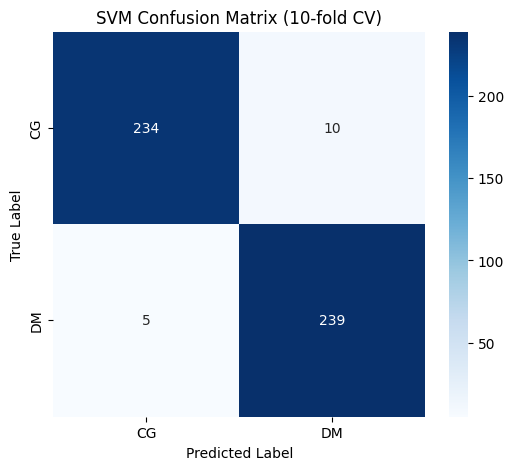

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM and parameter grid for Grid Search
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use accuracy as the scoring metric
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_svm = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_svm, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'SVM':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'SVM':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix (10-fold CV)")
plt.show()


knn

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
KNN             DM       0.8020      0.9946      0.9959           0.7541           0.8750
KNN             CG       0.9946      0.8020      0.7541           0.9959          


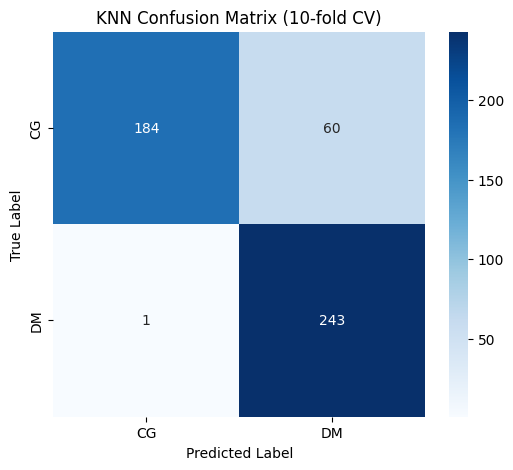

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define KNN and parameter grid for Grid Search
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust this range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_knn = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_knn, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'KNN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'KNN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix (10-fold CV)")
plt.show()


dt

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
DT              DM       0.8750      0.9138      0.9180           0.8689           0.8934
DT              CG       0.9138      0.8750      0.8689           0.9180          


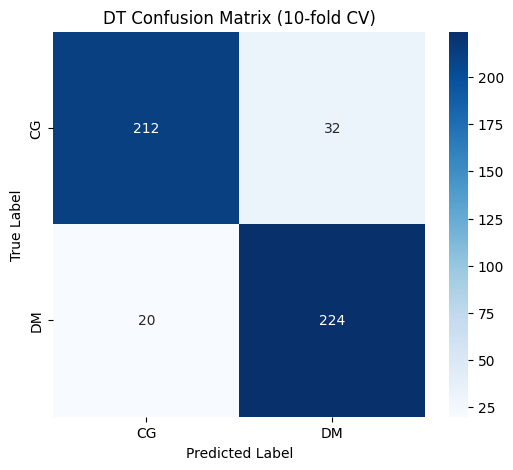

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Decision Tree and parameter grid for Grid Search
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_dt = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_dt, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'DT':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'DT':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DT Confusion Matrix (10-fold CV)")
plt.show()


lda

Fitting 10 folds for each of 3 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py", line 716, in fit
    self._solve_eigen(
  File

Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
LDA             DM       0.8828      0.9224      0.9262           0.8770           0.9016
LDA             CG       0.9224      0.8828      0.8770           0.9262          


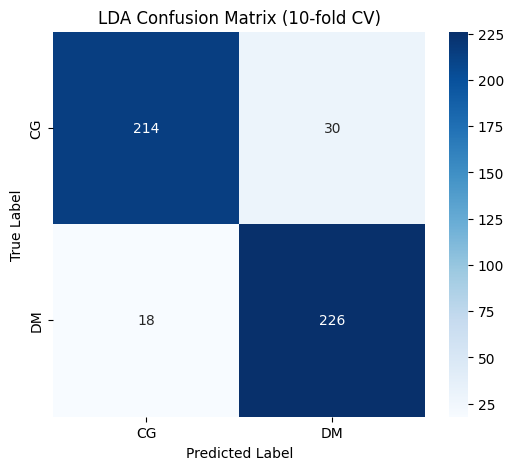

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define LDA and parameter grid for Grid Search
lda = LinearDiscriminantAnalysis()
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=lda,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_lda = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_lda, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'LDA':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'LDA':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("LDA Confusion Matrix (10-fold CV)")
plt.show()


nb

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
NB              DM       0.9073      0.9208      0.9221           0.9057           0.9139
NB              CG       0.9208      0.9073      0.9057           0.9221          


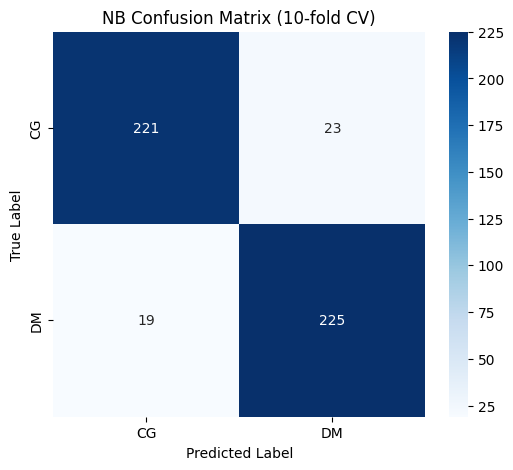

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
csv_path = "/content/balanced_resnet50_wf.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define NB and parameter grid for Grid Search
nb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(-9, -6, 4)
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=nb,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_nb = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_nb, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NB':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NB':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NB Confusion Matrix (10-fold CV)")
plt.show()


nn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier  # Use scikeras, not tensorflow.keras.wrappers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load the Excel file containing features
csv_path = "/content/balanced_resnet50_wf.xlsx"
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features to improve NN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define function to create model with configurable hyperparameters
def create_model(neurons1=64, neurons2=32, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        Dense(neurons1, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons2, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier for use with sklearn's GridSearchCV
# Use the updated syntax for KerasClassifier in scikeras
model = KerasClassifier(
    model=create_model,  # Pass the create_model function
    neurons1=64,         # Set default values for hyperparameters
    neurons2=32,
    dropout_rate=0.2,
    optimizer='adam',
    verbose=0
)


# Define hyperparameter grid for grid search
# Update parameter names to use 'model__' prefix
param_grid = {
    'model__neurons1': [32, 64, 128],
    'model__neurons2': [16, 32, 64],
    'model__dropout_rate': [0.1, 0.2, 0.3],
    'batch_size': [16, 32, 64],
    'epochs': [30, 50, 80],
    'model__optimizer': ['adam', 'rmsprop']
}

# Create 10-fold cross-validation as mentioned in the paper
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform Grid Search with 10-fold CV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,  # Remove or set to 1 if causing issues
    verbose=1
)

# Fit the grid search model
print("Performing grid search to find optimal hyperparameters...")
grid_search.fit(X_scaled, y)

# ... (rest of the code remains the same)

# Get best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Use cross_val_predict to get predictions using the best model
print("Generating cross-validated predictions...")
# Set n_jobs to 1 to avoid potential issues with Keras and multiprocessing
y_pred = cross_val_predict(best_model, X_scaled, y, cv=cv, n_jobs=1)

# Calculate metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("\nBest classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("NN Confusion Matrix (10-fold CV)")
plt.show()

Training and evaluating model with 10-fold CV...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step

Neural Network Performance (10-fold CV):
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
NN              DM       0.5039      0.5043      0.5246           0.4836           0.5041
NN              CG       0.5043      0.5039      0.4836           0.5246          


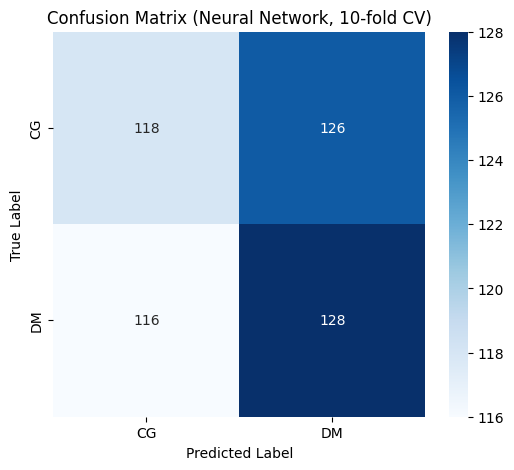

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load data
csv_path = "/content/balanced_resnet50_wf.xlsx"
df = pd.read_excel(csv_path)
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the NN model
def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
all_preds = []

print("Training and evaluating model with 10-fold CV...")
for train_idx, val_idx in cv.split(X_scaled, y):
    model = create_model()
    model.fit(X_scaled[train_idx], y.iloc[train_idx], epochs=50, batch_size=32, verbose=0)
    preds = (model.predict(X_scaled[val_idx]) > 0.5).astype("int32").flatten()
    all_preds.extend(preds)

# Evaluate final results
conf_matrix = confusion_matrix(y, all_preds)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, all_preds)

# Metrics for class 1 (DM)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for class 0 (CG)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Display metrics
print("\nNeural Network Performance (10-fold CV):")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'NN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'NN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Neural Network, 10-fold CV)")
plt.show()
